<h2>Default of Credit Cards - Predictive Modeling comparison between Random Forest and XGBoost</h2>
<hr>

<h3>Dataset:</h3>
The dataset is taken from UCI Machine Learning Repository. <br>
The link to this dataset is : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

![title](crimage.png)

<hr>

<h3>Attribute Information</h3>

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:<br>
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br>
X2: Gender (1 = male; 2 = female).<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
X4: Marital status (1 = married; 2 = single; 3 = others).<br>
X5: Age (year).<br>
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.<br>
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. <hr>

<h3>Task-1:Problem Formulation, Data Acquisition and Preparation</h3

In [1]:
#Loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Reading the excel file in a dataframe
df = pd.read_excel("credit_default.xls",error_bad_lines=False,warn_bad_lines=True)

In [2]:
df.info() #checking the basic information of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [3]:
#column PAY_0 is renamed as PAY_1, as there is PAY_2 directly after PAY_0
#default payment next month is too long for a label
df.rename(columns = {'default payment next month':'DEF_PAY','PAY_0':'PAY_1'},inplace=True) 

In [4]:
df.head() # checking how the data looks like

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.describe() #basic statistics of the dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<ol>
    <li>There are no missing values for any attribute. </li>
<li>Average credit limit is 167000. Minimum is 10000 and maximum is  10,000,00.</li>
    <li>Mean age is 35 years. Youngest customers are of 21 years and oldest customers are of 79 years.</li>
    <li>Minimum bill amount statements are in negetive. Therefore, it can be said that they are in credit of this much amount. Maximum bill statements are somewhere near 900-100k.</li>
</ol><hr>

In [6]:
df['ID'].duplicated().any() #checking for duplicates

False

No redundant instances.<hr>

In [7]:
#Iterating over categorical columns to find how many unique values they have.
for column in df[['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    print(df[column].value_counts())
    print("====================================")


2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: in

<hr>
<ol>
    <li> In Education column: labels for values 0,5,6 are not defined. So they can be clubbed with 4 as "Other" category.</li>
    <li>In Marriage column: label for value 0 is not defined, so it can be clubbed with 3 as "Others".</li>
    <li> Columns for History of Payment: PAY_1 to PAY_6 have values -2 and 0 which are not labelled. Therefore, I am clubbing -2, -1 as 0 indicating payment was made on time</li>
   </ol>
<hr>    

In [8]:
 #Clubbing unknown values with 'Other' category
df['EDUCATION'].replace([0,5,6],4,inplace=True)
df['MARRIAGE'].replace(0,3,inplace=True)
for column in df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    df[column].replace([-2,-1],0,inplace=True)


<h3> Task 2: Data Exploration</h3>

<h4> Task 2.1: Univariate Analysis </h4>

<Figure size 432x288 with 0 Axes>

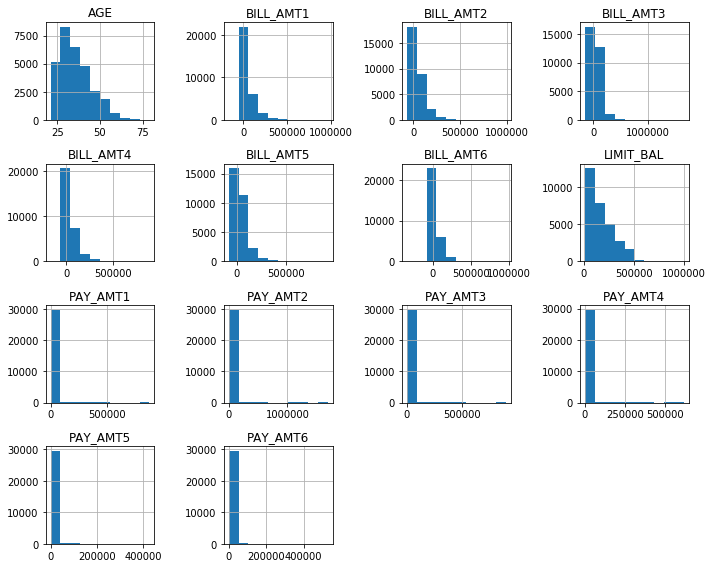

In [9]:
#Filtering out categorical columns and ID to create histograms of numerical columns
df_copy = df.drop(['ID','SEX','EDUCATION','MARRIAGE','DEF_PAY','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1) 
plt.figure(1)
df_copy.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

<ol>
<li>Most customers are aged between 25 to 45 years. </li>
    <li>For many customers bill amount is less than 0 for columns (BILL_AMT1 to BILL_AMT6), which can be inferred as they are paying in advance or they are in credit of that much amount and the amount for most of these cases is nearly around 20,000. Customers having bill amount more than 500k can be considered as outliers in the data. </li>
    <li>Most customers have credit limit between 10K to 100K. Very few customers have credit limit more than 500k.</li>
    <li>Data in columns PAY_AMT1 to PAY_AMT6 is heavily biased and mostly in the same range.</li>
</ol>

In [10]:
#Defining a plot function to reduce redundancy of code and ease of use
def bar_plots(feature):
    df[feature].value_counts().plot(figsize=(10,8),kind='bar')
      

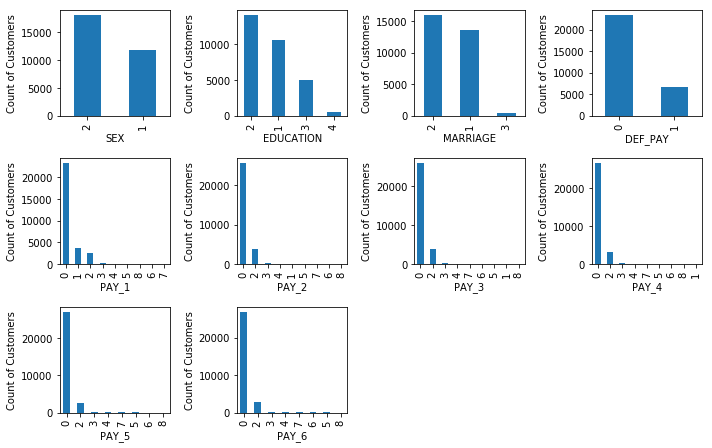

In [11]:
#Visualizing categorical columns using bar chart to find out distribution of values
plt.subplot(441)
bar_plots('SEX')
plt.xlabel("SEX")
plt.ylabel("Count of Customers")


plt.subplot(442)
bar_plots('EDUCATION')
plt.xlabel("EDUCATION")
plt.ylabel("Count of Customers")


plt.subplot(443)
bar_plots('MARRIAGE')
plt.xlabel("MARRIAGE")
plt.ylabel("Count of Customers")

plt.subplot(444)
bar_plots('DEF_PAY')
plt.xlabel("DEF_PAY")
plt.ylabel("Count of Customers")



plt.subplot(445)
bar_plots('PAY_1')
plt.xlabel("PAY_1")
plt.ylabel("Count of Customers")


plt.subplot(446)
bar_plots('PAY_2')
plt.xlabel("PAY_2")
plt.ylabel("Count of Customers")


plt.subplot(447)
bar_plots('PAY_3')
plt.xlabel("PAY_3")
plt.ylabel("Count of Customers")


plt.subplot(448)
bar_plots('PAY_4')
plt.xlabel("PAY_4")
plt.ylabel("Count of Customers")


plt.subplot(449)
bar_plots('PAY_5')
plt.xlabel("PAY_5")
plt.ylabel("Count of Customers")


plt.subplot(4,4,10)
bar_plots('PAY_6')
plt.xlabel("PAY_6")
plt.ylabel("Count of Customers")
plt.tight_layout()
plt.show()

<ol>
    <li>Number of female customers present in the database is higher than male customers. </li>
    <li>Nearly half of the customers have their education level of University or graduate school. Only few customers have their education levels graduate school. </li>
    <li>Nearly 16000 customers in the database are single. Around 13000 customers in the database are married.</li>
    <li>Around 7000 customers present in the database will default on the payment next month. The data is biased and resampling is needed for better modelling. However, it is out of scope for this assignment.</li>
    <li>The delayed payments were mostly delayed for two months for the duration of April to September 2005. Most customers either paid on time or before time. </li> 
    </ol><hr>

<h4>Task 2.2 Bivariate Analysis</h4>

Do Marriage, Education or Sex have an effect on DEF_PAY?

DEF_PAY,0,1,%_def
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


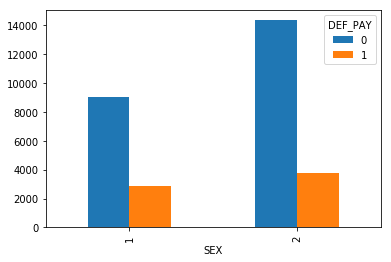

In [12]:
#Sex
gender=pd.crosstab(df.SEX,df.DEF_PAY)
gender.plot(kind='bar')
gender['%_def'] = (gender[1]/(gender[0] + gender[1]))
gender


Nearly 24% Male default and 20% of female default on payment.<hr>

DEF_PAY,0,1,%_def
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


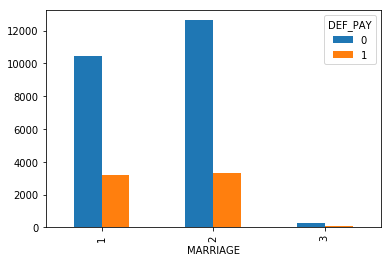

In [13]:
#Marriage
marriage = pd.crosstab(df.MARRIAGE,df.DEF_PAY)
marriage.plot(kind='bar')
marriage['%_def']= (marriage[1]/(marriage[0]+marriage[1]))
marriage

Nearly 23.47% married customers default, 21% single customers default and 23.60% other customers default.<hr>

DEF_PAY,0,1,%_def
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


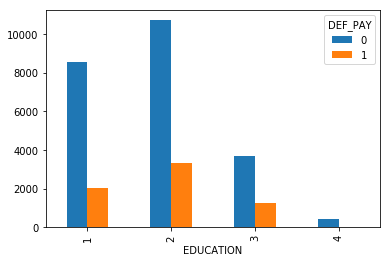

In [14]:
#education
education = pd.crosstab(df.EDUCATION,df.DEF_PAY)
education.plot(kind='bar')
education['%_def']= (education[1]/(education[0]+education[1]))
education

Default rate for Education Levels are given below.
<ol>
    <li>19% of people who have completed graduation default on payment.</li>
    <li>Nearly 24% of people who have attended university default on payment.</li>
    <li>25% of customers who have studied till high school level default on payment.</li>
    <li>Nearly 7% of customers for whom the education details are not present will default on payment.</li>
   </ol><hr>

<h4>Task 2.3:Question-based analysis</h4>

_"Are columns for BILL_AMTX and PAY_AMTX related with other columns in the same group?"


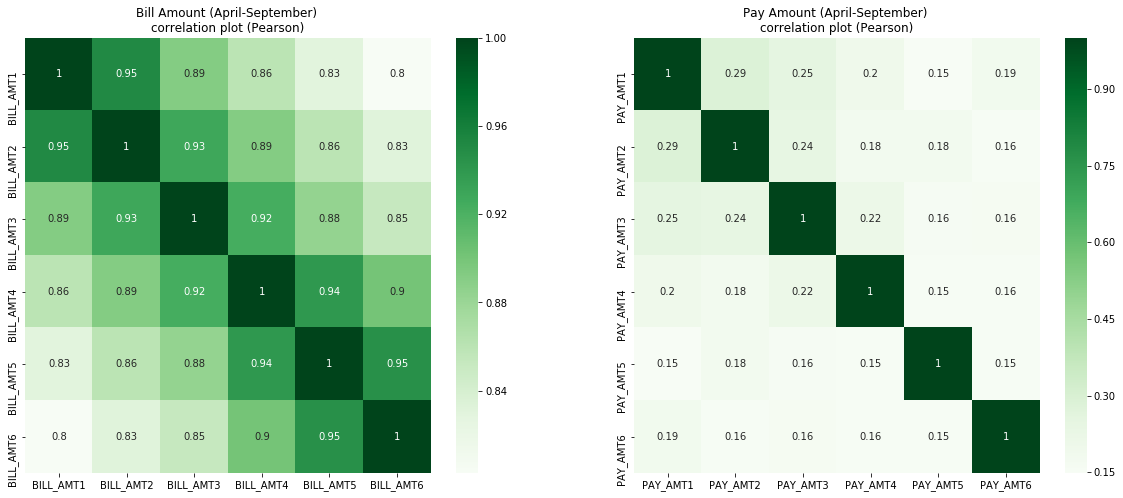

In [15]:
#numerical columns relationships
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Bill Amount (April-September) \ncorrelation plot (Pearson)')
corr1 = df[bill_amt].corr()
sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns,cmap="Greens",annot=True)

pay_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']
plt.subplot(122)
plt.title('Pay Amount (April-September) \ncorrelation plot (Pearson)')
corr2 = df[pay_amt].corr()
sns.heatmap(corr2,xticklabels=corr2.columns,yticklabels=corr2.columns,cmap="Greens",annot=True)
plt.show()

<h4>Exploring relationships between columns</h4>

<ol>
    <li>The correlation is increasing with each bill amount, from BILL_AMT6 (April) to BILL_AMT1(September). Each bill_amount is highly correlated with its previous and next bills</li>
    <li> There is no significant correlation between PAY_AMT columns.
    </ol><hr>
    

_"Are columns of BILL_AMTX and PAY_AMTX are related with each other?"

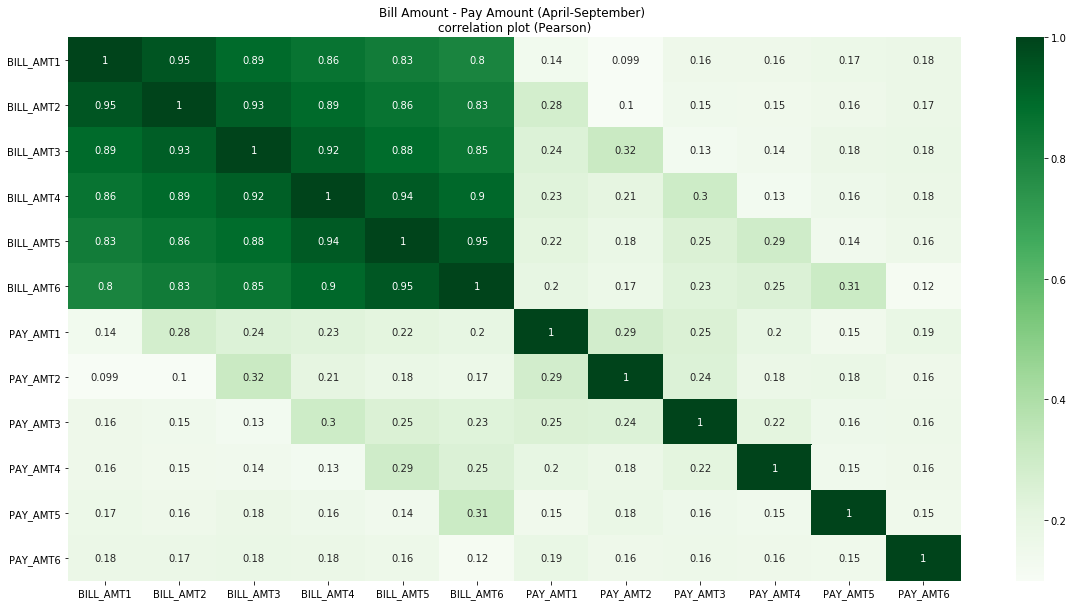

In [16]:
bill_pay_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']
plt.figure(figsize = (20,10))
plt.title('Bill Amount - Pay Amount (April-September) \ncorrelation plot (Pearson)')
corr = df[bill_pay_amt].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="Greens",annot=True)
plt.show()


No Significant correlation between BILL_AMT & PAY_AMT columns.<hr>

<h3>Task-3: Data Modelling</h3>

Preparing the data by encoding the categorical attributes and deleting unnecessary attributes.

In [17]:
df.drop(['ID'],axis=1,inplace=True)#Droppping ID column

cat_feats = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] 

dummies = pd.get_dummies(df,columns = cat_feats,drop_first=True) #Encoding categorical variables using one-hot encoding

<h3>Random Forest Classifier</h3>

In [18]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5,10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [19]:
#Model-1 Suite-1

y = dummies['DEF_PAY'] #Independent Variable
X = dummies.drop('DEF_PAY',axis=1) #Dependent Variables

#Training test split, with test size 50%
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.4, random_state=55) 


#Creating classifier varaible
rfc = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train,y_train)# fitting the training data to model
rfc_predict = rf_random.predict(X_test) #making predictions

accuracy = accuracy_score(y_test, rfc_predict)#calculating test accuracy
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_train, rf_random.predict(X_train))#calculating train accuracy
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

rfc_cv_score_50 = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc') #calc AUC scores

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score_50)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score_50.mean())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.2min finished


Test Accuracy: 81.77%
Training Accuracy: 87.27%


C:\Users\bajan\.conda\envs\py27\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


=== Confusion Matrix ===
[[8895  451]
 [1736  918]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9346
           1       0.67      0.35      0.46      2654

   micro avg       0.82      0.82      0.82     12000
   macro avg       0.75      0.65      0.67     12000
weighted avg       0.80      0.82      0.79     12000



=== All AUC Scores ===
[0.7108495  0.71430145 0.73669645 0.73570001 0.73848485]


=== Mean AUC Score ===
('Mean AUC Score - Random Forest: ', 0.7272064509402756)


In [20]:
rf_random.best_params_#finding out best parameters for the model

{'bootstrap': True,
 'max_depth': 41,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 889}

We will use these parameters to tune our next model.<hr>

In [21]:
#Model-2 Suite-2

#Separating target and features
y1 = dummies['DEF_PAY']
X1 = dummies.drop('DEF_PAY',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1,stratify=y1,test_size=0.4, random_state=66)#train test split

# tuning RFC using best params of previous model
rfc = RandomForestClassifier(bootstrap= True,n_estimators=1300,min_samples_leaf=2,
                             min_samples_split=10,max_features='sqrt',max_depth=45,verbose=1,n_jobs=-1)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

accuracy = accuracy_score(y_test, rfc_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_train, rfc.predict(X_train))
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

rfc_cv_score_40 = cross_val_score(rfc, X1, y1, cv=5, verbose=0,scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score_40)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score_40.mean())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 1300 out of 1300 | elapsed:   24.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1300 out of 1300 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Test Accuracy: 81.97%


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1300 out of 1300 | elapsed:    2.7s finished


Training Accuracy: 88.79%


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1300 out of 1300 | elapsed:   39.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1300 out of 1300 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Paral

=== Confusion Matrix ===
[[8891  455]
 [1709  945]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9346
           1       0.68      0.36      0.47      2654

   micro avg       0.82      0.82      0.82     12000
   macro avg       0.76      0.65      0.68     12000
weighted avg       0.80      0.82      0.80     12000



=== All AUC Scores ===
[0.7556749  0.75162589 0.78931752 0.79908753 0.79341316]


=== Mean AUC Score ===
('Mean AUC Score - Random Forest: ', 0.7778238014189058)


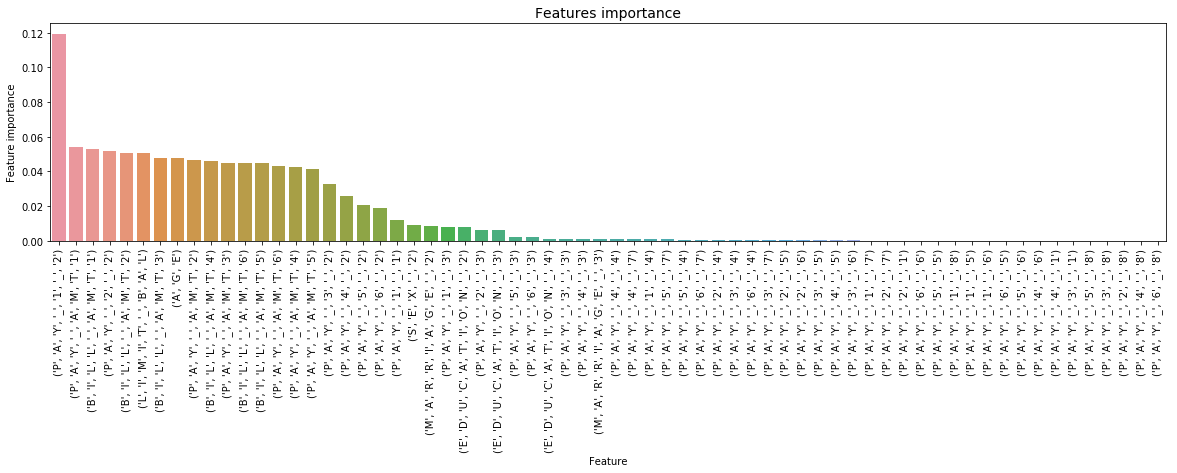

In [22]:
#Visualizing Important Features.
tmp = pd.DataFrame({'Feature': X1, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [23]:
tmp[0:20] #Taking top features to build next model

,Feature,Feature importance
21,"(P, A, Y, _, 1, _, 2)",0.119545
8,"(P, A, Y, _, A, M, T, 1)",0.054222
2,"(B, I, L, L, _, A, M, T, 1)",0.053026
29,"(P, A, Y, _, 2, _, 2)",0.052018
3,"(B, I, L, L, _, A, M, T, 2)",0.050596
0,"(L, I, M, I, T, _, B, A, L)",0.050388
4,"(B, I, L, L, _, A, M, T, 3)",0.047723
1,"(A, G, E)",0.047463
9,"(P, A, Y, _, A, M, T, 2)",0.046542
5,"(B, I, L, L, _, A, M, T, 4)",0.045952


In [24]:
#Model-3 Suite-3
#Separating Features and Targets. Choosing best features of previous model to build this model.
y2 = dummies['DEF_PAY']
X2 = dummies[['PAY_1_2','PAY_2_2','PAY_AMT1','BILL_AMT1','LIMIT_BAL','BILL_AMT2',
              'PAY_AMT2','PAY_3_2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','AGE','PAY_AMT3','PAY_AMT4','PAY_AMT6',
              'PAY_AMT5','PAY_4_2']]

X_train, X_test, y_train, y_test = train_test_split(X2, y2,stratify=y2, test_size=0.20, random_state=7018)


rfc = RandomForestClassifier(bootstrap= True,n_estimators=200,min_samples_leaf=6,
                             min_samples_split=15,verbose=1,n_jobs=-1)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)# predictions

accuracy = accuracy_score(y_test, rfc_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_train, rfc.predict(X_train))
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

rfc_cv_score_20 = cross_val_score(rfc, X2, y2, cv=5, verbose=0,scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score_20)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score_20.mean())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Test Accuracy: 82.20%


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


Training Accuracy: 86.73%


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | el

=== Confusion Matrix ===
[[4434  239]
 [ 829  498]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.38      0.48      1327

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



=== All AUC Scores ===
[0.75062611 0.7442108  0.78590811 0.79744225 0.78553985]


=== Mean AUC Score ===
('Mean AUC Score - Random Forest: ', 0.7727454252840735)


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


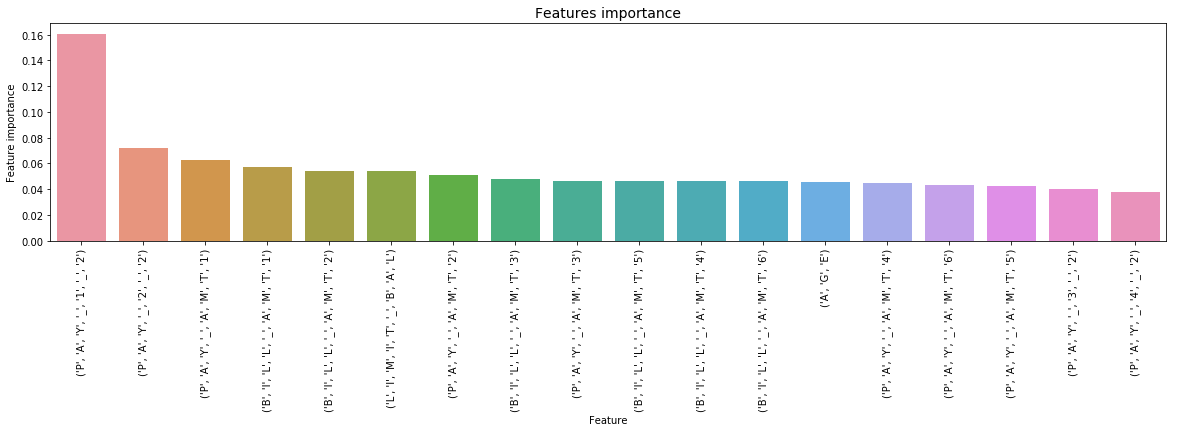

In [25]:
#Checking for important features
tmp = pd.DataFrame({'Feature': X2, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

<h3>XGBoost Classifier</h3>

In [ ]:
#importing the libraries just in case they are not imported before.
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

In [26]:
#Model-1 Suite-1 XGB
X_XGB = dummies.drop('DEF_PAY',axis=1)
y_XGB = dummies['DEF_PAY']

X_train, X_test, y_train, y_test = train_test_split(X_XGB, y_XGB,stratify=y_XGB,test_size=0.50, random_state=1234)

xgb = XGBClassifier(silent=0,n_jobs=-1)
xgb.fit(X_train,y_train)


# make predictions for test data
y_pred = xgb.predict(X_test)
xgb_predict = [round(value) for value in y_pred] #Rounding Off the predictions to get binary output.


accuracy = accuracy_score(y_train, xgb.predict(X_train))
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_test, xgb_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

xgb_cv_score_50 = cross_val_score(xgb, X_XGB, y_XGB, cv=5,verbose=1, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, xgb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
print(xgb_cv_score_50)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGboost: ", xgb_cv_score_50.mean())


Train Accuracy: 82.94%
Test Accuracy: 82.01%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


=== Confusion Matrix ===
[[11128   554]
 [ 2144  1174]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     11682
           1       0.68      0.35      0.47      3318

   micro avg       0.82      0.82      0.82     15000
   macro avg       0.76      0.65      0.68     15000
weighted avg       0.80      0.82      0.80     15000



=== All AUC Scores ===
[0.75393813 0.7542635  0.79261292 0.80047495 0.80123397]


=== Mean AUC Score ===
('Mean AUC Score - XGboost: ', 0.7805046929673003)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.8s finished


In [27]:
#Model-2 Suite-2 XGB
X_XGB1 = dummies.drop('DEF_PAY',axis=1)
y_XGB1 = dummies['DEF_PAY']

X_train, X_test, y_train, y_test = train_test_split(X_XGB1, y_XGB1,stratify=y_XGB1 ,test_size=0.40, random_state=1234)

xgb = XGBClassifier(silent=0,n_jobs=-1)
xgb.fit(X_train,y_train)


# make predictions for test data
y_pred = xgb.predict(X_test)
xgb_predict = [round(value) for value in y_pred]

accuracy = accuracy_score(y_train, xgb.predict(X_train))
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_test, xgb_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))


xgb_cv_score_40 = cross_val_score(xgb, X_XGB1, y_XGB1, cv=5, verbose=1,scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, xgb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
print(xgb_cv_score_40)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGboost: ", xgb_cv_score_40.mean())


Train Accuracy: 82.71%
Test Accuracy: 81.96%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


=== Confusion Matrix ===
[[8913  433]
 [1732  922]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9346
           1       0.68      0.35      0.46      2654

   micro avg       0.82      0.82      0.82     12000
   macro avg       0.76      0.65      0.68     12000
weighted avg       0.80      0.82      0.80     12000



=== All AUC Scores ===
[0.75393813 0.7542635  0.79261292 0.80047495 0.80123397]


=== Mean AUC Score ===
('Mean AUC Score - XGboost: ', 0.7805046929673003)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.5s finished


In [28]:
#Model-3 Suite-3 XGB
X_XGB2 = dummies.drop('DEF_PAY',axis=1)
y_XGB2 = dummies['DEF_PAY']

X_train, X_test, y_train, y_test = train_test_split(X_XGB2, y_XGB2,stratify=y_XGB2,test_size=0.20, random_state=5678)

xgb = XGBClassifier(silent=0,n_jobs=-1)
xgb.fit(X_train,y_train)


# make predictions for test data
y_pred = xgb.predict(X_test)
xgb_predict = [round(value) for value in y_pred]

accuracy = accuracy_score(y_train, xgb.predict(X_train))
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_test, xgb_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

xgb_cv_score_20 = cross_val_score(xgb, X_XGB2, y_XGB2, cv=5,verbose=1,scoring='roc_auc')


print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, xgb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
print(xgb_cv_score_20)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGboost: ", xgb_cv_score_20.mean())


Train Accuracy: 82.57%
Test Accuracy: 81.82%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


=== Confusion Matrix ===
[[4446  227]
 [ 864  463]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



=== All AUC Scores ===
[0.75393813 0.7542635  0.79261292 0.80047495 0.80123397]


=== Mean AUC Score ===
('Mean AUC Score - XGboost: ', 0.7805046929673003)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.0s finished


<h4> Task 2.3 Perfomance Comparison<h4>

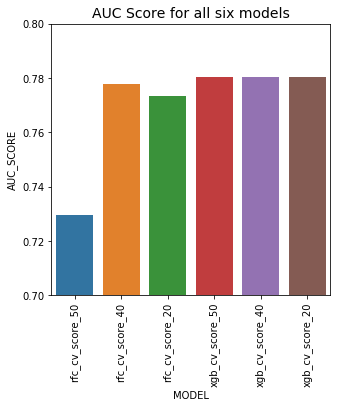

In [29]:
data = {'MODEL':['rfc_cv_score_50','rfc_cv_score_40','rfc_cv_score_20',
                 'xgb_cv_score_50','xgb_cv_score_40','xgb_cv_score_20'],
       'AUC_SCORE':[0.7294,0.7778,0.7733,0.7805,0.7805,0.7805]}

auc_df = pd.DataFrame(data,columns=['MODEL','AUC_SCORE'])


plt.figure(figsize = (5,5))
plt.title('AUC Score for all six models',fontsize=14)
s = sns.barplot(x='MODEL',y='AUC_SCORE',data=auc_df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.ylim(0.7,0.8)
plt.show()

<ul>
    <li> XGB models have higher AUC score compared to RFC models.</li>
    <li> Suite-1 model for RFC is the worst performing model in the group.</li>
    <li>All XGB models have same AUC score despite different test sizes.</li>
</ul><hr>